In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

## Syllabus

1. **Probabilities and interpretations**
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. Introduction to multivariate analysis techniques

# Chapter 1

## Topics

**[1.1 Probabilities and Interpretation](#1.1-Probabilities-and-Interpretation)**
- 1.1.1 Statistics and probabilities
- **Case study**: Cancer research breakthrough

**[1.2 Basics of presentation of data](#1.2-Basics-of-presentation-of-data)**
- 1.2.1 Data presentation
- 1.2.2 Measures of central tendency
    - Arithmetic mean
    - Geometric mean
    - Harmonic mean
    - Root mean square
    - Median
    - Mode
- 1.2.3 Measures of dispersion
    - Variance and standard deviation
    - Mean absolute deviation
- 1.2.4 Other indicators
    - Skewness
    - Kurtosis
- 1.2.5 Multiple variables
    - Covariance
    - Correlation
    - Covariance matrix
- **Case study**: Correlation does not imply causation

## Further Reading Material

- **Barlow**: Chapter 2 - *General introduction about types of data and measures to describe them*
- [Kelleher & Wagener (2012)](https://doi.org/10.1016/j.envsoft.2010.12.006) - *Paper presenting key principle for effective data visualisation*
- Wikipedia page on [Correlation and dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)
- Wikipedia page on [Covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix)

## 1.1 Probabilities and Interpretation

### 1.1.1 Statistics and probabilities


```
"There are three kinds of lies: lies, damned lies, and statistics."
```
<div style="text-align: right">(Benjamin Disraeli, 1804–1881)</div>

*Note: this phrase popularised by Mark Twain is most likely misattributed to former British Prime Minister Benjamin Disraeli, with the original source not known.*

#### Context

*Statistics is a tool*. [Barlow]

Statistics is possibly the most useful and versatile tool that a physicist can master. In physics, or in any other field of experimental research for that matter, measurements are essentially always obtained with associated uncertainties. The interpretation of the results fundamentally depends on a proper statistical analysis of the data. Even outside of natural sciences statistics are crucial. Think about assessing the effectiveness of a new drug in medical sciences, or determining the best approach to dealing with health care deployment in social sciences. Computer scientists need to consider statistics, as numerical techniques bear inherent errors through, e.g., rounding off errors. If you are a pure 'theorist' you probably will not escape it either; remember Boltzmann's distribution?

Statistics and data analysis form the building blocks of **data science**, which is at the heart of research but also the 'real world'.

If Edison once said that that genius is 1% percent inspiration and 99% perspiration, then data science must be 1% data and 99% statistical analysis.

### Case study: Cancer research breakthrough

New interesting development for the detection of cancer.

<div class="container-fluid">
    <div class="row">
        <div class="col-md-6" align="center">
            <b>BBC Report</b>
        </div>
        <div class="col-md-6" align="center">
            <b>Article in Science</b>
        </div>
    </div>
</div>

<br>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-6" align="center">
            <img src="images/cancerBBC.screen.png" width="75%">
        </div>
        <div class="col-md-6">
            <img src="images/cancerScience.screen.png" width="75%"><br><br>
            <img src="images/cancerBBC.qrcode.png" width="30%"><br><br><br>
            <img src="images/cancerScience.qrcode.png" width="30%">
        </div>
    </div>
</div>

<br>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-6" align="center">
            Source: <a href="http://www.bbc.co.uk/news/health-42736764">BBC</a>
        </div>
        <div class="col-md-6" align="center">
            Source: <a href="http://science.sciencemag.org/content/early/2018/01/17/science.aar3247">Science</a>
        </div>
    </div>
</div>

This is a genuinely great development for cancer research: this new test can find one of eight types of difficult to detect cancers 70% of the time (sensitivity).

There is however some caution to exercise here. What might be the issues with the reported news? Here are the most important points:
1. From the article (main body) we learn that 70% success rate is the median success rate of the study. The success rate for Stage I, Stage II and Stage III cancers are 43%, 73% and 78%, respectively.
2. From the article (abstract) we learn that the specificity (i.e. 1 - false positive rate) of the test is 99.14%.

The latter implies that a healthy (non-cancerous) adult tested for most of their adult life (40 years) would have a 29% chance of being tested positive. How did we get this?

> We want to calculate the chance of not getting a false positive in 40 years.

> The chance of not being controlled as false positive in one year is $0.9914$. This means that the chance of not being controlled as false positive after 40 years is the product of the probabilities for each year: $0.9914^{40}$.

> Finally, the chance of getting a false positive after 40 years is $1 - 0.9914^{40} = 0.29$.

We can therefore see that if the entire population we subjected to systematic testing through this method, a lot of people would receive the bad news, while further testing would reveal they do not have cancer after all. This is not all bad news; this just means that before rolling out this test in such a way the specificity would need to be improved.

```
News outlets, for good and bad reasons, tend to truncate some of the details of a story.
Always look at the original sources and check the maths.
```

## 1.2 Basics of presentation of data

### 1.2.1 Data presentation

_[This subsection follows from Barlow, Chapter 2.]_

#### Description of data
**Definition**: _Facts and statistics collected together for reference or analysis._ [Oxford Dictionary]

There are two types of data:
- Qualitative / non-numeric: colour, preference food, feeling toward service quality
- Quantitative / numeric: length of an object, decay rate of a particle, flux from a star

Quantitative data can be divided into two subtypes:
- Discrete data: number of photons detected, number of persons
- Continuous data: potential difference, mass of galaxies

Qualitative data are often difficult to analyse in a way that is practical for data science. For this reason, they are often 'translated' into quantitative (approximation) in order to enable them to be processed. An 'absolute' (or independent) quantitative measure is however sometimes difficult to obtain: a colour can be converted to RGB fairly easily, but a customer feelings on a scale of 0-10 is more arbitrary. The translation of qualitative to quantitative is in itself an entire field of research.

In this course, we will mostly focus on quantitative data.

#### Data visualisation
Datasets, especially when large, are difficult to make sense in their raw format directly (i.e. a large collection of numbers). One way of organising and making sense of them is through data visualisation.

```
One should never use data blindly and try as much as possible to visualise data.
```

It is beyond the scope of this course to look in details into various visualisation methods. For modern ways of visualising data, we would recommend the following references:
- [Matplotlib's Example Gallery](https://matplotlib.org/gallery/index.html): Matplotlib is the go-to plotting package for Python. It contains a rich gallery of examples which includes the source code and data to generate each plot.
- [Seaborn's Example Gallery](https://seaborn.pydata.org/examples/index.html): Seaborn is a Python visualisation library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
- [Ten Simple Rules for Better Figures](https://doi.org/10.1371/journal.pcbi.1003833): An article about good practices for data visualisation.
- [Ten guidelines for effective data visualization in scientific publications](https://doi.org/10.1016/j.envsoft.2010.12.006): A great article by Christa Kelleher and Thorsten Wagener about the dos and don'ts of data visualisation.


##### *Ten guidelines for effective data visualization in scientific publications*
This subsection follows from the paper by [Kelleher & Wagener (2012)](https://doi.org/10.1016/j.envsoft.2010.12.006).

1. Create the simplest graph that conveys the information you want to convey
2. Consider the type of encoding object and attribute used to create a plot
3. Focus on visualizing patterns or on visualizing details, depending on the purpose of the plot
4. Select meaningful axis ranges
5. Data transformations and carefully chosen graph aspect ratios can be used to emphasize rates of change for time-series data
6. Plot overlapping points in a way that density differences become apparent in scatter plots
7. Use lines when connecting sequential data in time-series plots
8. Aggregate larger datasets in meaningful ways
9. Keep axis ranges as similar as possible to compare variables
10. Select an appropriate color scheme based on the type of data

<div class="container-fluid">
    <div class="row">
        <div class="col-md-5" align="center">
            <img src="images/1-s2.0-S1364815210003270-gr1a.jpg" width="95%">
        </div>
        <div class="col-md-5" align="center">
            <img src="images/1-s2.0-S1364815210003270-gr1b.jpg" width="95%">
        </div>
    </div>
</div>

(Source of the figure: [Kelleher & Wagener (2012)](https://doi.org/10.1016/j.envsoft.2010.12.006))

### 1.2.2 Measures of central tendency

If one attempts to describe data with a single value, a central tendency measure is probably the most useful quantity to use. A variety of options are available. Some of the most common are described below.

In these examples, we define a dataset containing N elements as:

\begin{equation}
  S = \{x_1, x_2, x_3,...,x_N\}
\end{equation}

Example dataset
x = {4, 1, 3, 9, 5, 4, 4, 6, 2, 4, 7, 7, 4, 3, 2}

Binned data:
value:  0, 1, 2, 3, 4, 5, 6, 7, 8, 9
weight: 0, 1, 2, 2, 5, 1, 1, 2, 0, 1


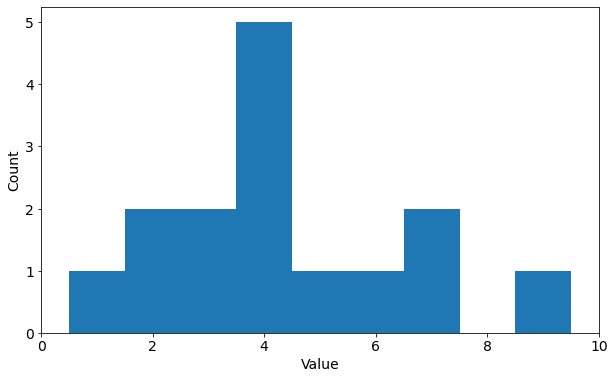

In [3]:
## Define a set of data
#x = np.random.poisson(4, size=15)
x = np.array([4, 1, 3, 9, 5, 4, 4, 6, 2, 4, 7, 7, 4, 3, 2])
print('Example dataset')
print('x = {' + ', '.join(['{}'.format(xi) for xi in x]) + '}')

fig,ax = plt.subplots(figsize=[10,6])
weights, bins, patches = ax.hist(x, range=[0,10], bins=10, align='left')
weights = weights.astype(int)
bins = bins[:-1].astype(int)
ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_xlim([0,10]);

print('')
print('Binned data:')
print('value:  ' + ', '.join(['{}'.format(b) for b in bins]))
print('weight: ' + ', '.join(['{}'.format(w) for w in weights]))

#### Arithmetic mean

This is the simplest and most common central measure.

The *arithmetic mean* is:

\begin{equation}
  \langle x \rangle = \frac{1}{N} \sum_{i=1}^{N} x_i \,.
\end{equation}

Similarly, the mean of a function $f(x)$ is:

\begin{equation}
  \langle f(x) \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i) \,.
\end{equation}

In the case of a binned dataset containing $J$ bins each with value $x_j$ and containing $n_j$ elements, the means can be written:

\begin{equation}
  \langle x \rangle = \frac{1}{N} \sum_{j=1}^{J} n_j x_j \,,
\end{equation}

\begin{equation}
  \langle f(x) \rangle = \frac{1}{N} \sum_{j=1}^{J} n_j f(x_j) \,.
\end{equation}

This definition for the binned data is nothing else than a weigthed mean. Be mindful about the fact that the exact way you bin the data can affect the value of the central tendency you calculate.

In the continuous case, the summation turns into integrals:

\begin{equation}
  \langle x \rangle = \frac{ \int_{x_{\rm min}}^{x_{\rm max}} n(x) x {\rm d}x }{ \int_{x_{\rm min}}^{x_{\rm max}} n(x) {\rm d}x } \,,
\end{equation}

\begin{equation}
  \langle f(x) \rangle = \frac{ \int_{x_{\rm min}}^{x_{\rm max}} n(x) f(x) {\rm d}x }{ \int_{x_{\rm min}}^{x_{\rm max}} n(x) {\rm d}x } \,.
\end{equation}

_We often refer to the arithmetic mean as the mean (i.e. dropping the "arithmetic" part) or average. These words are all synonyms. However, other central measures introduced below must be referred to with their full terminology (i.e. harmonic mean is not equal to mean)._

<div class="example">Example 1</div>

With the above dataset. The unbinned arithmetic mean is:

\begin{equation}
  \langle x \rangle = \frac{1}{15} \left( 4 + 1 + \dots + 2 \right) = 4.333
\end{equation}

With the binned data:

\begin{equation}
  \langle x \rangle = \frac{1}{15} \left( 0 \cdot 0 + 1 \cdot 1 + \dots + 1 \cdot 9  \right) = 4.333
\end{equation}

In [4]:
print('Example calculation in Python\n')

## Calculate the arithmetic mean, the slow way
m = 0.
for xi in x:
    m += xi

m /= x.size
print('Arithmetic mean (slow): {:.3f}'.format(m))

## Calculate the arithmetic mean the fast way
m = np.mean(x)
print('Arithmetic mean (fast): {:.3f}'.format(m))

## Binned average
m = np.sum(bins*weights)/weights.sum()
print('Arithmetic mean for binned data: {:.3f}'.format(m))

Example calculation in Python

Arithmetic mean (slow): 4.333
Arithmetic mean (fast): 4.333
Arithmetic mean for binned data: 4.333


#### Geometric mean

The *geometric mean* is calculated as the N-th root of the product of the N elements in the dataset:

\begin{equation}
  {\rm GM} = \left( \prod_{i=1}^{N} x_i \right)^{\frac{1}{N}}
\end{equation}

The geometric mean can be visualised as the side of an hypercube of hyper-area equal to the product of the elements.

Occasionally, the geometric mean is also referred to as the log-average as, for positive real numbers it corresponds to the exponential value of the arithmetic mean of logarithms:

\begin{equation}
  {\rm GM} = \left( \prod_{i=1}^{N} x_i \right)^{\frac{1}{N}} = \exp \left[ \frac{1}{N} \sum_{i=1}^{N} \ln x_i \right]
\end{equation}

_**Note: When the geometric mean of a large number of elements is to be calculated, it is generally more numerically stable to use the logarithmic expression.**_

_Example application 1:_ As we shall see later in this course, this property is particularly useful in Bayesian statistics for computing likelihood and posterior probabilities.

_Example application 2:_ Another implicit use of the geometric mean is if you fit a straight line to data in the log-log space (i.e. fitting a power-law relationship: $y = A x^\beta$).

<div class="example">Example 1</div>

With the above dataset. The geometric mean is:

\begin{equation}
  {\rm GM} = \left( 4 \cdot 1 \cdot 3 \dots \cdot 2 \right)^{1/15} = 3.795
\end{equation}

In [5]:
print('Example calculation in Python\n')

## Calculate the geometric mean
m = np.product(x)**(1./x.size)

print('Geometric mean: {:.3f}'.format(m))

Example calculation in Python

Geometric mean: 3.795


#### Harmonic mean

The *harmonic mean* is the reciprocal of the arithmetic mean of the reciprocals:

\begin{equation}
  H = \frac{N}{\sum_{i=1}^{N} \frac{1}{x_i}}
\end{equation}

The harmonic mean makes more sense for positive real numbers. By construction, the harmonic mean is dominated by the minimum of its arguments and is only little affected by changing some of the large values of the dataset. In fact, for positive real numbers the harmonic mean, H, is a Schur-concave function:

\begin{equation}
  \min(x_1,...,x_N) \leq H \leq N \min(x_1,...,x_N) .
\end{equation}

*Example application 1:* In physics the harmonic mean is particularly useful in situations involving rates and ratios. One example is that of a vehicle travelling a distance $d$ at a speed $v_1$ and then the same distance at a speed $v_2$. The true average speed of the vehicule can be found as the harmonic mean of $v_1$ and $v_2$. However, if the vehicule travel for a time $t$ at a speed $v_1$ and then the same time at a speed $v_2$, the true average is found using the arithmetic mean instead. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean))

*Example application 2:* Similarly, the average resistance of a parallel circuit made of resistors is also found using the harmonic mean.

<div class="example">Example 1</div>

With the above dataset. The harmonic mean is:

\begin{equation}
  H = \frac{15}{\left( 1/4 + 1/1 + 1/3 \dots + 1/2 \right)} = 3.205
\end{equation}

In [6]:
print('Example calculation in Python\n')

## Calculate the harmonic mean
m = x.size/np.sum(1./x)

print('Harmonic mean: {:.3f}'.format(m))

Example calculation in Python

Harmonic mean: 3.205


#### Root mean square

The *root mean square* is the square root of the sum of the squares:

\begin{equation}
  {\rm RMS} = \sqrt{\frac{\sum_{i=1}^{N} x_i^2}{N}}
\end{equation}

*Example application 1:* The root mean square is useful to calculate the average value of quantities that oscillate over time, such as the average voltage of an AC circuit.

*Example application 2:* In the same spirit as the previous example, the RMS would provide the average distance travelled by a particle subjected to Brownian motion.

<div class="example">Example 1</div>

With the above dataset. The root mean square is:

\begin{equation}
  {\rm RMS} = \sqrt{\frac{4^2 + 1^2 + 3^2 + \dots + 2^2}{15}} = 0.949
\end{equation}

In [7]:
print('Example calculation in Python\n')

## Calculate the RMS
m = np.sqrt(np.sum(x**2)/x.size)

print('RMS: {:.3f}'.format(m))

Example calculation in Python

RMS: 4.810


#### Median

The *median* is the value separating the upper half of a dataset from the lower half when it is ordered.

- For a discrete dataset with an odd number of elements, the median is the middle value.
- For a discrete dataset with an even number of elements, the median is defined as the average of the two middle values.
- In a continuous distribution, the median is the value such that the probability of being above or below is equal.

The median is an extremely useful quantity when analysing data containing outliers or extremes values (e.g. a heavy tail) as it is a much more robust (i.e. less biased) method of estimating the central value of a distribution.

Computationally, using the median comes at a cost: it requires the ordering of elements in a dataset and as such can be much slower than the mean.

*Example application:* The median household income is a much better indicator of the wealth of a population than the mean household income as there is a handful of extremely rich people but a lot of very poor people.

<div class="example">Example 1</div>

With the above dataset. The sorted dataset is:

x = {1, 2, 2, 3, 3, 4, 4, 4, 4, 4, 5, 6, 7, 7, 9}

There are 15 elements, so it is an odd number. The middle value is 4. So:

median = 4

In [8]:
print('Example calculation in Python\n')

## Calculate the median
m = np.median(x)

print('Median: {}'.format(m))

Example calculation in Python

Median: 4.0


<div class="example">Example 2</div>

What would be the median of this sorted dataset?

a = {1,3,4,5,7,8}

Answer: 4.5 (i.e. the average of 4 and 5 due to the even number of elements in it)

<div class="example">Example 3</div>

For a distribution given by $f(x) = \sin x$ in the interval $x \in [0,\pi]$, the median would be found as following.

Probability of $f(x)$ under the interval:

\begin{equation}
    \int_0^\pi \sin x \, {\rm d}x = -\cos x \, \Big|_0^\pi = 2
\end{equation}

Therefore, the median is the value of $x_{\rm med}$ such that:

\begin{eqnarray}
    \int_0^{x_{\rm med}} \sin x \, {\rm d}x &=& 2 / 2 \\
    -\cos x_{\rm med} + 1 &=& 1 \\
    x_{\rm med} &=& \pi/2
\end{eqnarray}



#### Mode

The *mode* of a discrete dataset is the value that appears most often. In other words, it is the value at which the probability distribution reaches a maximum. A dataset or distribution containing one mode is said unimodal, whereas one with multiple mode is called multimodal.

- For an analytic distribution, one can find the mode(s) by finding the value at which the gradient of the function is equal to zero
- For non-analytic distributions, the mode is not always easy to calcultate. It can be found by looking at an histogram, though the binning my influence the answer. In a continuous unimodal distribution the median often lies between the mode and arithmetic mean. Consequently, a good approximation for the mode was found by Karl Pearson: mode $\approx$ 3 $\times$ median - 2 $\times$ mean. Note that this is not always the case.

*Example application:* Given that the mode is the most likely value of a distribution, it is particularly useful in quantum mechanics as the figure of merit to describe, say, the most likely position of an electron around a nucleus.

<div class="example">Example 1</div>

With the above dataset. Looking at the histogram above, we can see that the distribution peaks at a value of 4.

If, instead, we were to use Pearson's approximation, we would get:

\begin{equation}
    3 \cdot 4.0 - 2 \cdot 4.33 = 3.33
\end{equation}

In [9]:
print('Example calculation in Python\n')

## Calculate the mode
from scipy import stats
m = stats.mode(x)
print('Mode: {}'.format(m[0][0]))

Example calculation in Python

Mode: 4


<div class="example">Example 2</div>

For a distribution given by $f(x) = \sin x$ in the interval $x \in [0,\pi]$, the mode is the value of $x_{\rm mod}$ such that:

\begin{eqnarray}
    \frac{\partial \sin x}{\partial x} \Big|_{x_{\rm mod}} &=& 0 \\
    x_{\rm mod} = \pi/2
\end{eqnarray}

Below is a comparison of the arithmetic mean, median and mode for two distributions having the same median.

<img src="images/Comparison_mean_median_mode.svg" width="50%">

(Source: [Cmglee](https://commons.wikimedia.org/wiki/User:Cmglee), [Comparison mean median mode](https://commons.wikimedia.org/wiki/File:Comparison_mean_median_mode.svg), [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/legalcode))

### 1.2.3 Measures of dispersion

Another extremely useful way to characterise a dataset or distribution is by using a measure of its dispersion (or spread).

#### Variance and standard deviation

The *variance* is probably the best known indicator of dispersion. It is defined as:

\begin{equation}
  V(x) = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2 \,,
\end{equation}

where $\mu$ is the true mean of the distribution.

The variance characterises the spread in the distribution, however it has unit of $[x_i]^2$ which is not the most useful representation of the data. Instead, it is often more appropriate to use the *standard deviation*:

\begin{equation}
  \sigma = \sqrt{V(x)} = \sqrt{ \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2 } \,.
\end{equation}

In many situations, the true mean of the distribution is unknown and so one needs to calculate the mean from the sample dataset itself using the arithmetic mean, $\langle x \rangle$. We therefore distinguish between the **population variance**, $V(x)$ (above), and the **sample variance**, $s^2$ (below), depending on how the mean is calculated. Therefore:

\begin{equation}
  s^2_{\rm uncorr} = \frac{1}{N} \sum_{i=1}^N (x_i - \langle x \rangle)^2 \,.
\end{equation}

Without going into the details at this point we shall note that when the mean is calculated from the sample dataset, it is more common to normalise by a factor $N-1$ instead of $N$ to account for the bias in calculating the mean from the sample. Hence:

\begin{equation}
  s^2_{\rm corr} = \frac{1}{N-1} \sum_{i=1}^N (x_i - \langle x \rangle)^2 \,.
\end{equation}

This previous definition with the $N-1$ factor is often called the **corrected/unbiased sample variance**, as opposed to the previous form with the $N$ factor which is called the **uncorrected/biased sample variance**. The same applies to the sample standard deviation, which is simply the square root of the sample variance, $s$.

_**Note: In most practical cases it is impossible to determine the true mean of the population, which means that the sample variance is often the default choice. Always make sure that you know which definition someone or a computer programme uses.**_

<div class="example">Example 1</div>

With the above dataset. Without showing the full details:

\begin{equation}
    s^2_{\rm uncorr} = 4.356
\end{equation}

\begin{equation}
    s^2_{\rm corr} = 4.667
\end{equation}

In [10]:
print('Example calculation in Python\n')

## Calculate the uncorrected variance, the slow way
m = np.mean(x)
var = np.sum((x-m)**2) / x.size
print('Uncorrected sample variance (slow): {:.3f}'.format(var))

## Calculate the uncorrected variance, the fast way
var = np.var(x)
print('Uncorrected sample variance (fast): {:.3f}'.format(var))
print('')

## Calculate the corrected variance, the slow way
m = np.mean(x)
var = np.sum((x-m)**2) / (x.size-1)
print('Corrected sample variance (slow): {:.3f}'.format(var))
print('')

## Calculate the corrected standard deviation, the fast way
std = np.std(x)
print('Uncorrected sample standard deviation: {:.3f}'.format(std))

Example calculation in Python

Uncorrected sample variance (slow): 4.356
Uncorrected sample variance (fast): 4.356

Corrected sample variance (slow): 4.667

Uncorrected sample standard deviation: 2.087


#### Mean absolute deviation

Another common measure of dispersion is the *mean absolute deviation*:

\begin{equation}
  {\rm MAD} = \frac{1}{N} \sum_{i=1}^N \left| x_i - \langle x \rangle \right|
\end{equation}

This measure can be more robust to outliers than the standard deviation. On the other hand, analytical work involving absolute values (especially in differential calculus) is more complicated (as one needs to consider both the positive and negative scenario).

A similar measure is the *median absolute deviation* (also known as MAD), which is the absolute difference from the median instead of the mean.

<div class="example">Example 1</div>

With the above dataset. The mean absolute deviation is:

\begin{equation}
  {\rm MAD} = \frac{1}{15} \left( \left| 4 - 4.33 \right| + \left| 1 - 4.33 \right| + \dots + \left| 2 - 4.33 \right| \right)
\end{equation}

In [11]:
print('Example calculation in Python\n')

## Calculate the mean absolute deviation
s = np.sum(np.abs(x - np.mean(x))) / x.size
print('Mean absolute deviation: {:.3f}'.format(s))

Example calculation in Python

Mean absolute deviation: 1.644


### 1.2.4 Other indicators

There are other single value indicators that can help characterise a distribution or a dataset. The *skewness* and *kurtosis* (defined below) are often seen as not very useful. However, they can prove to be useful quantities in the field of machine learning, for instances, as 'features' that can enable to classify populations.

#### Skewness

The *skewness* measures the asymmetry of a distribution. It is also known as the third standardised moment:

\begin{equation}
  \gamma = \frac{1}{\sigma^3} \langle \left(x_i - \langle x \rangle \right)^3 \rangle = \frac{1}{N \sigma^3} \sum_{i=1}^N (x_i - \langle x \rangle)^3
\end{equation}

For a unimodal distribution a negative skew implies that the tail to the left is longer than the tail to the right, whereas a positive skew displays the opposite behaviour as showed in the picture below.

<img src="images/Negative_and_positive_skew_diagrams_(English).svg" width="75%">

(Source: [Rodolfo Hermans (Godot)](https://en.wikipedia.org/wiki/User:Rodolfo_Hermans), [Negative and positive skew diagrams (English)](https://commons.wikimedia.org/wiki/File:Negative_and_positive_skew_diagrams_%28English%29.svg), [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/legalcode))

<div class="example">Example 1</div>

With the above dataset. Without showing the full details:

\begin{equation}
    \gamma = 0.566
\end{equation}

In [12]:
print('Example calculation in Python\n')

## Calculate the skewness, the slow way
m = np.mean(x)
skew = np.sum((x-m)**3) / x.size / np.std(x)**3
print('Skewness (slow): {:.3f}'.format(skew))

## Calculate the skewness, the fast way
skew = scipy.stats.skew(x)
print('Skewness (fast): {:.3f}'.format(skew))

Example calculation in Python

Skewness (slow): 0.566
Skewness (fast): 0.566


#### Kurtosis

The *kurtosis* measures the 'tailedness' of a distribution. It is derived from the fourth standardised moment:

\begin{equation}
  \kappa = \frac{1}{\sigma^4} \langle \left(x_i - \langle x \rangle \right)^4 \rangle - 3 = \frac{1}{N \sigma^4} \sum_{i=1}^N (x_i - \langle x \rangle)^4 - 3
\end{equation}

The minus three factor ensures that the kurtosis is defined as 0 for a Gaussian distribution. For a unimodal distribution resembling the Gaussian distribution, a positive kurtosis implies that the probability of the distribution is more concentrated around the mean. Conversely, a negative kurtosis implies that the probability is more spread in the tails.

<img src="images/Standard_symmetric_pdfs.png" width="50%">

(Source: [MarkSweep](https://commons.wikimedia.org/wiki/User:MarkSweep), [Standard symmetric pdfs](https://commons.wikimedia.org/wiki/File:Standard_symmetric_pdfs.png), [Wikimedia Commons](https://commons.wikimedia.org/wiki/Template:PD-self))

<div class="example">Example 1</div>

With the above dataset. Without showing the full details:

\begin{equation}
    \kappa = -0.286
\end{equation}

In [13]:
print('Example calculation in Python\n')

## Calculate the kurtosis
kurtosis = scipy.stats.kurtosis(x)
print('Kurtosis: {:.3f}'.format(kurtosis))

Example calculation in Python

Kurtosis: -0.286


### 1.2.5 Multiple variables

So far the quantities that we have considered are defined on a single dimension. In many data science applications, datasets will comprise more than one type of variable (i.e. it will be multi-dimensional). In which case, it is useful to look at how some key measures can be generalised.

Example dataset
x = { 0.0, -1.9, -0.4, -1.4, -2.0,  1.9, -1.7,  1.2, -1.5,  0.6, -1.3, -1.5, -0.1, -0.6,  0.1}
y = {-2.0, -1.2, -0.2, -1.1, -1.5,  1.5, -1.2,  0.4, -1.7, -0.8, -0.3, -1.0,  0.3, -0.9,  0.0}
z = { 1.1,  0.6, -0.1, -0.5,  1.7,  0.1,  0.5, -2.2,  1.6,  0.7,  0.5, -0.1,  1.0, -0.3, -0.4}


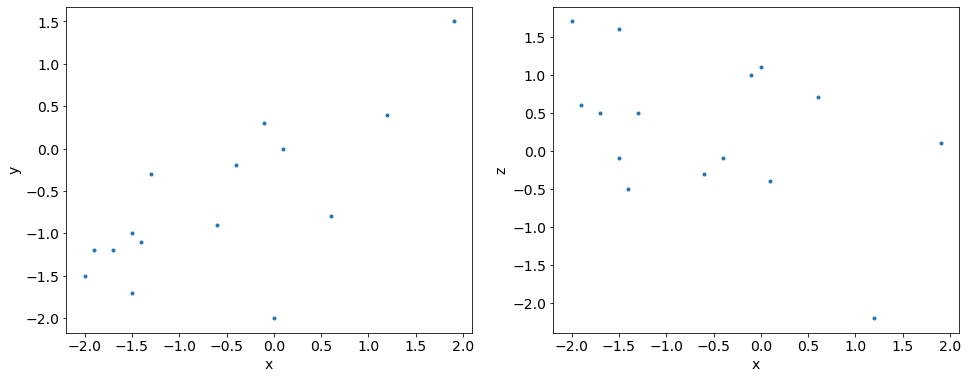

In [14]:
## Define a set of data
#tmp = np.random.multivariate_normal([0.,0.], [[1.,0.7],[0.7,1.]], size=15)
#x, y = np.round(tmp, 1).T
#z = np.random.normal(size=15)
#z = np.round(z, 1)
x = np.array([ 0.0, -1.9, -0.4, -1.4, -2.0, 1.9, -1.7,  1.2, -1.5,  0.6, -1.3, -1.5, -0.1, -0.6, 0.1])
y = np.array([-2.0, -1.2, -0.2, -1.1, -1.5, 1.5, -1.2,  0.4, -1.7, -0.8, -0.3, -1.0,  0.3, -0.9, 0.0])
z = np.array([ 1.1,  0.6, -0.1, -0.5,  1.7, 0.1,  0.5, -2.2,  1.6,  0.7,  0.5, -0.1,  1.0, -0.3, -0.4])
print('Example dataset')
print('x = {' + ', '.join(['{: }'.format(xi) for xi in x]) + '}')
print('y = {' + ', '.join(['{: }'.format(yi) for yi in y]) + '}')
print('z = {' + ', '.join(['{: }'.format(zi) for zi in z]) + '}')

fig,ax = plt.subplots(1, 2, figsize=[16,6])
_ = ax[0].plot(x, y, '.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
_ = ax[1].plot(x, z, '.')
ax[1].set_xlabel('x')
ax[1].set_ylabel('z');

#### Covariance

The *covariance* is the measure of the joint variability of two random variables. It is a extension of the concept of variance to two variables. Assuming the two random variables, $x$ and $y$, we defined the covariance as:

\begin{equation}
  \operatorname{cov}(x,y) = \frac{1}{N} \sum_{i=1}^N (x_i - \langle x \rangle)(y_i - \langle y \rangle)
\end{equation}

_**Note: As for the variance, the covariance is also subjected to the same principle of population vs sample covariance depending on how the mean is calculated. Similarly, the sample covariance can use the uncorrected/biased ($1/N$) or the corrected/unbiased ($1/(N-1)$) definition of the pre-factor.**_

<div class="example">Example 1</div>

For these datasets, we can calculate the following arithmetic means:

\begin{eqnarray}
    && \langle x \rangle = -0.573 \\
    && \langle y \rangle = -0.646 \\
    && \langle z \rangle =  0.28
\end{eqnarray}

Therefore:

\begin{eqnarray}
  \operatorname{cov}(x,y) &=& \frac{1}{15} \Big( (0+0.573)(-2+0.646) + (-1.9+0.573)(-1.2+0.646) + \dots \Big) \\
  &=& 0.745
\end{eqnarray}

\begin{eqnarray}
  \operatorname{cov}(x,z) &=& -0.475
\end{eqnarray}

\begin{eqnarray}
  \operatorname{cov}(y,z) &=& -0.418
\end{eqnarray}

In [15]:
print('Example calculation in Python\n')

## Calculating the covariance
cov = np.sum((x-np.mean(x))*(y-np.mean(y))) / x.size
print('cov(x,y): {:.3f}'.format(cov))
cov = np.sum((x-np.mean(x))*(z-np.mean(z))) / x.size
print('cov(x,z): {:.3f}'.format(cov))
cov = np.sum((y-np.mean(y))*(z-np.mean(z))) / x.size
print('cov(y,z): {:.3f}'.format(cov))

Example calculation in Python

cov(x,y): 0.745
cov(x,z): -0.475
cov(y,z): -0.418


#### Correlation

The covariance is a useful measure but has dimensions of $[x][y]$, which are not always easy to conceptualise. By normalising the covariance using the standard deviations of $x$ and $y$, we can obtain a dimensionless quantity, the *correlation*, which is often more practical:

\begin{equation}
  \rho_{(x,y)} = \frac{\operatorname{cov}(x,y)}{\sigma_x \sigma_y}
\end{equation}

The correlation is therefore a number between -1 and +1. If $\rho = 0$, there is no correlation between x and y; that is, the two variables are completely independent. If $\rho > 0$, larger (i.e. more positive) values of $x$ imply a tendency for $y$ value to also be larger. If $\rho < 0$, larger values of $x$ will tend to go with smaller (i.e. more negative) values of $y$.

_**Note: One must use a consistent definition of the covariance and standard deviation to calculate the correlation (i.e. either 'population' or 'sample'). In the latter case, the choice of the pre-factor (corrected or uncorrected) is irrelevant as it cancels out at the denominator and numerator.**_

Below are examples of distributions, with the associated correlation coefficient. It is important to note that
1. The correlation is not affected by the mean value of data points (i.e. it is translation invariant).
2. The correlation reflects the coupling between the two quantities, but is independent of the slope due to the normalisation by the standard deviations (i.e. it is scale invariant). (Note the the middle figure has an undefined correlation due to $\sigma_y = 0$.)
3. The correlation does not capture nonlinear coupling between the parameters.

<img src="images/1024px-Correlation_examples2.svg.png" width="75%">

(Source: [DenisBoigelot](https://commons.wikimedia.org/wiki/User:DenisBoigelot), [Correlation examples2](https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg), [CC0 1.0](https://creativecommons.org/publicdomain/zero/1.0/legalcode))

<div class="example">Example 1</div>

With the above datasets.

\begin{eqnarray}
    && \sigma_x = 1.145 \\
    && \sigma_y = 0.896 \\
    && \sigma_z = 0.938
\end{eqnarray}

(here we used the uncorrected sample standard deviation)

Using the above results:

\begin{eqnarray}
  \rho_{(x,y)} &=& \frac{0.745}{1.145 \cdot 0.896} = 0.726 \\
  \rho_{(x,z)} &=& -0.443 \\
  \rho_{(y,z)} &=& -0.498
\end{eqnarray}

In [16]:
print('Example calculation in Python\n')

## Calculating the correlation
cor = np.sum((x-np.mean(x))*(y-np.mean(y))) / x.size / np.std(x) / np.std(y)
print('Correlation x-y: {:.3f}'.format(cor))
cor = np.sum((x-np.mean(x))*(z-np.mean(z))) / x.size / np.std(x) / np.std(z)
print('Correlation x-z: {:.3f}'.format(cor))
cor = np.sum((y-np.mean(y))*(z-np.mean(z))) / y.size / np.std(y) / np.std(z)
print('Correlation y-z: {:.3f}'.format(cor))

Example calculation in Python

Correlation x-y: 0.726
Correlation x-z: -0.443
Correlation y-z: -0.498


#### Covariance matrix

In the case of more than two dimensions involving variables $X_1$, $X_2$, ..., $X_n$, one can represent all possible combination of covariance in a matrix.

\begin{equation}
  \Sigma = 
  \begin{bmatrix}
    \operatorname{cov}(X_1,X_1) & \operatorname{cov}(X_1,X_2) & \operatorname{cov}(X_1,X_3) & \dots  & \operatorname{cov}(X_1,X_n) \\
    \operatorname{cov}(X_2,X_1) & \operatorname{cov}(X_2,X_2) & \operatorname{cov}(X_2,X_3) & \dots  & \operatorname{cov}(X_2,X_n) \\
    \vdots       & \vdots & \vdots & \ddots & \vdots \\
    \operatorname{cov}(X_n,X_1) & \operatorname{cov}(X_n,X_2) & \operatorname{cov}(X_n,X_3) & \dots  & \operatorname{cov}(X_n,X_n)
  \end{bmatrix}
\end{equation}

It is relevant to note that this matrix is always symmetric and positive-semidefinite.

<div class="example">Example 1</div>

With the above datasets {x, y, z}. We can simply write the covariance matrix using the previous calculations:

\begin{eqnarray}
  \Sigma &=& 
  \begin{bmatrix}
     \sigma_x^2 & \operatorname{cov}(x,y) & \operatorname{cov}(x,z) \\
     \operatorname{cov}(y,x) & \sigma_y^2 & \operatorname{cov}(y,z) \\
    \operatorname{cov}(z,x) & \operatorname{cov}(z,y) & \sigma_z^2 \\
  \end{bmatrix} \\
   &=& 
  \begin{bmatrix}
     1.311 &  0.745 & -0.475 \\
     0.745 &  0.802 & -0.418 \\
    -0.475 & -0.418 &  0.880 \\
  \end{bmatrix}
\end{eqnarray}

In [17]:
print('Example calculation in Python\n')

## Calculating the covariance matrix
cov = np.cov([x, y, z], ddof=0)
print('Covariance matrix: {}'.format(cov))

Example calculation in Python

Covariance matrix: [[ 1.31128889  0.74524444 -0.47546667]
 [ 0.74524444  0.80248889 -0.41826667]
 [-0.47546667 -0.41826667  0.88026667]]


### Case study: Correlation does not imply causation

```
In statistics, many statistical tests calculate correlations between variables and when two variables are found to be correlated, it is tempting to assume that this shows that one variable causes the other.
```
<div style="text-align: right">(Source: <a href="https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation">Wikipedia</a>)</div>



#### The ice cream and drowning classic

*As ice cream sales increase, the rate of drowning deaths increases sharply.*

*Therefore, ice cream consumption causes drowning.*

<img src="images/Ice_Cream_and_Drowning_nolabels.png" width="65%">

Of course, eating ice cream does not causes a higher risk of drowning. The example fails to recognise that more people are exposed to water-related activities in the hot summer months when they are also likely to eat ice cream. Here, the _two variables are correlated because they share a common cause_.

The figure below provides crucial information about the hidden underlying link.

<img src="images/Ice_Cream_and_Drowning_labels.png" width="65%">

#### Predicting your course mark

Here are data from the 2018 edition of PHYS 10792 Introduction to Data Science. There is a stricking correlation between the overall grade and the coursework grade.

<img src="images/Assign_Exam.png" width="50%">

Is there a causation between these two quantities? One could claim that this has to do with how 'good' your are academically. However...

<img src="images/Grade_Missed.png" width="50%">

The figure above shows a clear link between the overall grade and the number of missed assignments. It appears that how much you engage with the course has a strong influence on how well you do. This is a very important distinction as it has nothing to do, at least to first order, with your 'academic proficiency'.

Examples like the ice cream and drowning are everywhere and are a leading cause of 'bad science'. This is partly why we keep hearing about contradictory results in medical sciences (e.g. red wine makes you live longer vs wine reduces your life expectancy).

For more information about the topic, please read:

[Correlation does not imply causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)

[Adrian Thinnyun's Blog on Medium](https://medium.com/@athinnyun/lies-damned-lies-and-statistics-week-four-of-satellite-bootcamp-30661e77b8b8)

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>